In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

pengwings_raw = pd.read_csv('penguins.csv')
pengwings_raw

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [45]:
pengwings_raw.info()
pengwings_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.755814
std,5.459584,1.974793,14.061714,801.954536,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


<Axes: >

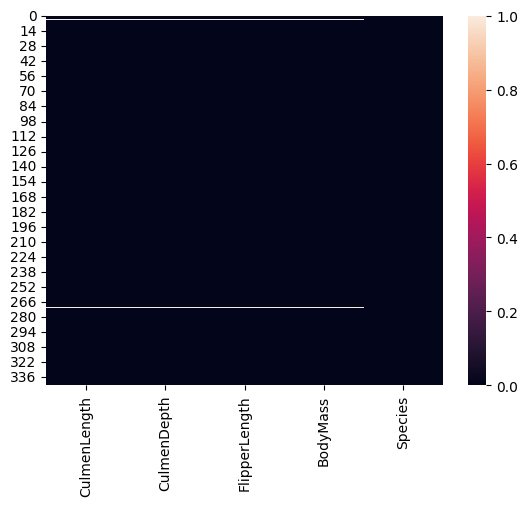

In [46]:
import seaborn as sns

sns.heatmap(pengwings_raw.isnull())

In [47]:
pengwings = pengwings_raw.dropna()

In [48]:
features_num = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'
X, y = pengwings[features_num], pengwings[target]

Unique values 164
Unique values 80
Unique values 55
Unique values 94
Unique values 3


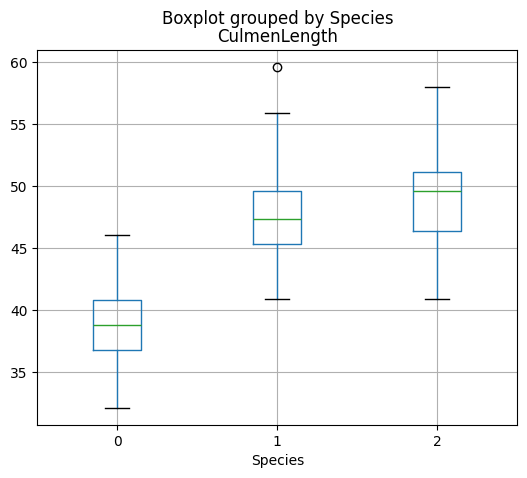

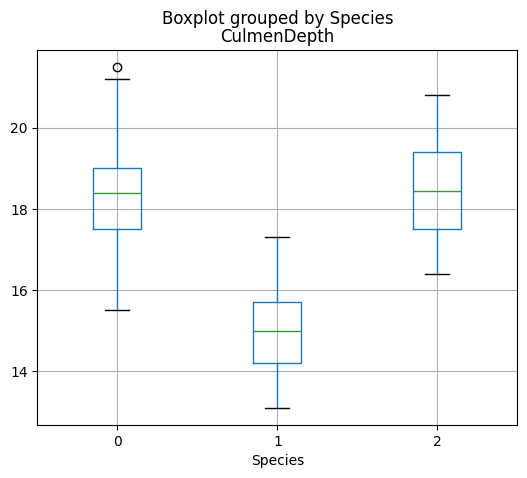

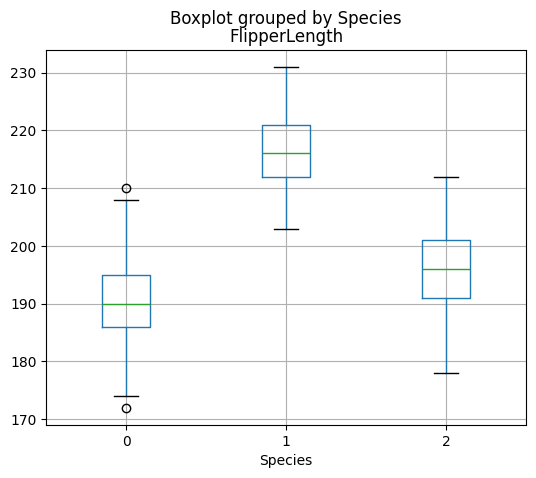

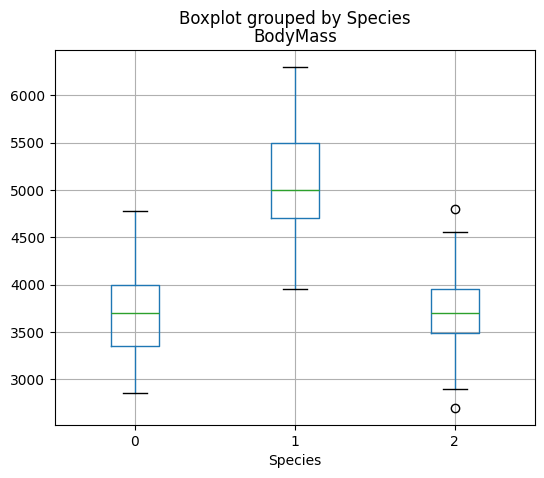

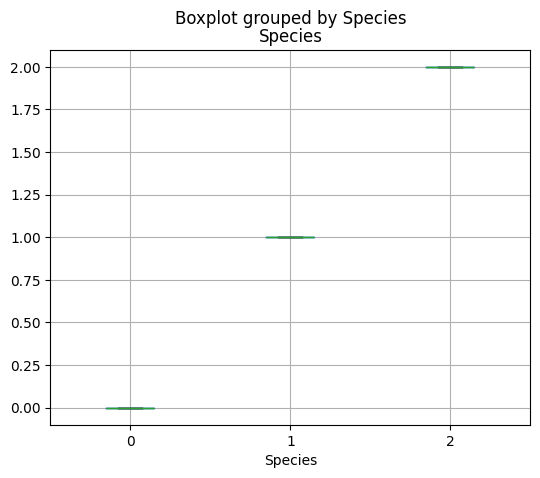

In [49]:
import matplotlib.pyplot as plt
for col in pengwings:
    print(f'Unique values {len(pengwings[col].unique())}')
    pengwings.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\2111720761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pengwings.loc[pengwings['Species']==0, col], kde=True, color='green', label='0')
C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\2111720761.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

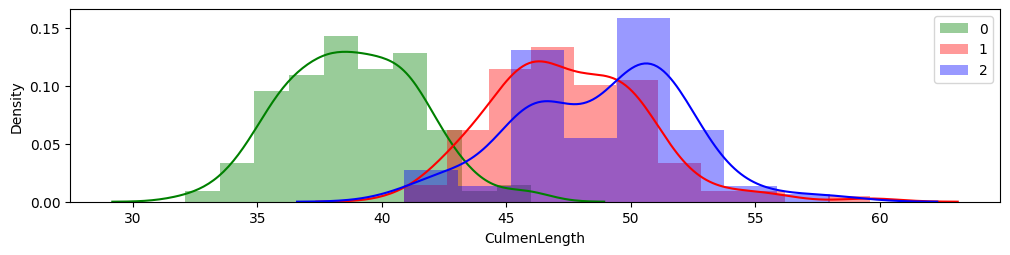

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\2111720761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pengwings.loc[pengwings['Species']==0, col], kde=True, color='green', label='0')
C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\2111720761.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

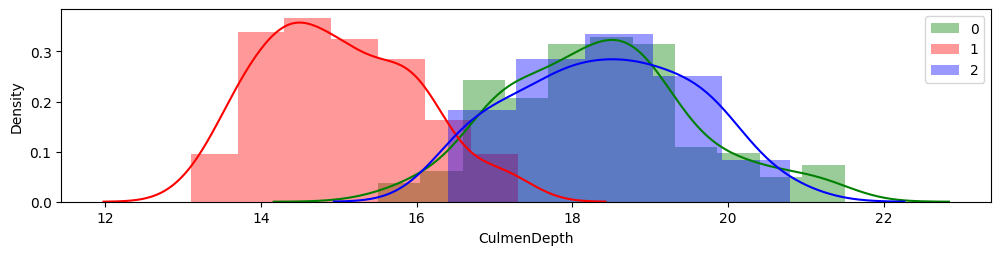

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\2111720761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pengwings.loc[pengwings['Species']==0, col], kde=True, color='green', label='0')
C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\2111720761.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

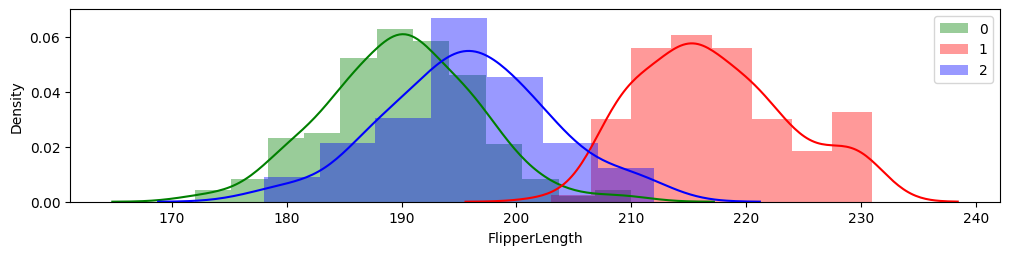

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\2111720761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pengwings.loc[pengwings['Species']==0, col], kde=True, color='green', label='0')
C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\2111720761.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

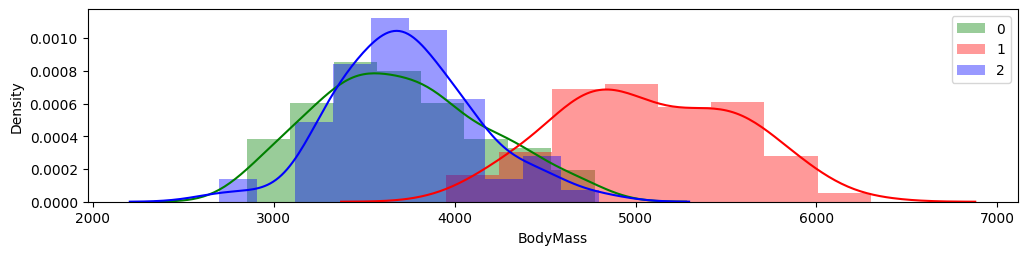

In [50]:
for col in features_num:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(pengwings.loc[pengwings['Species']==0, col], kde=True, color='green', label='0')
    sns.distplot(pengwings.loc[pengwings['Species']==1, col], kde=True, color='red', label='1')
    sns.distplot(pengwings.loc[pengwings['Species']==2, col], kde=True, color='blue', label='2')
    plt.legend(loc='upper right')
    plt.show()

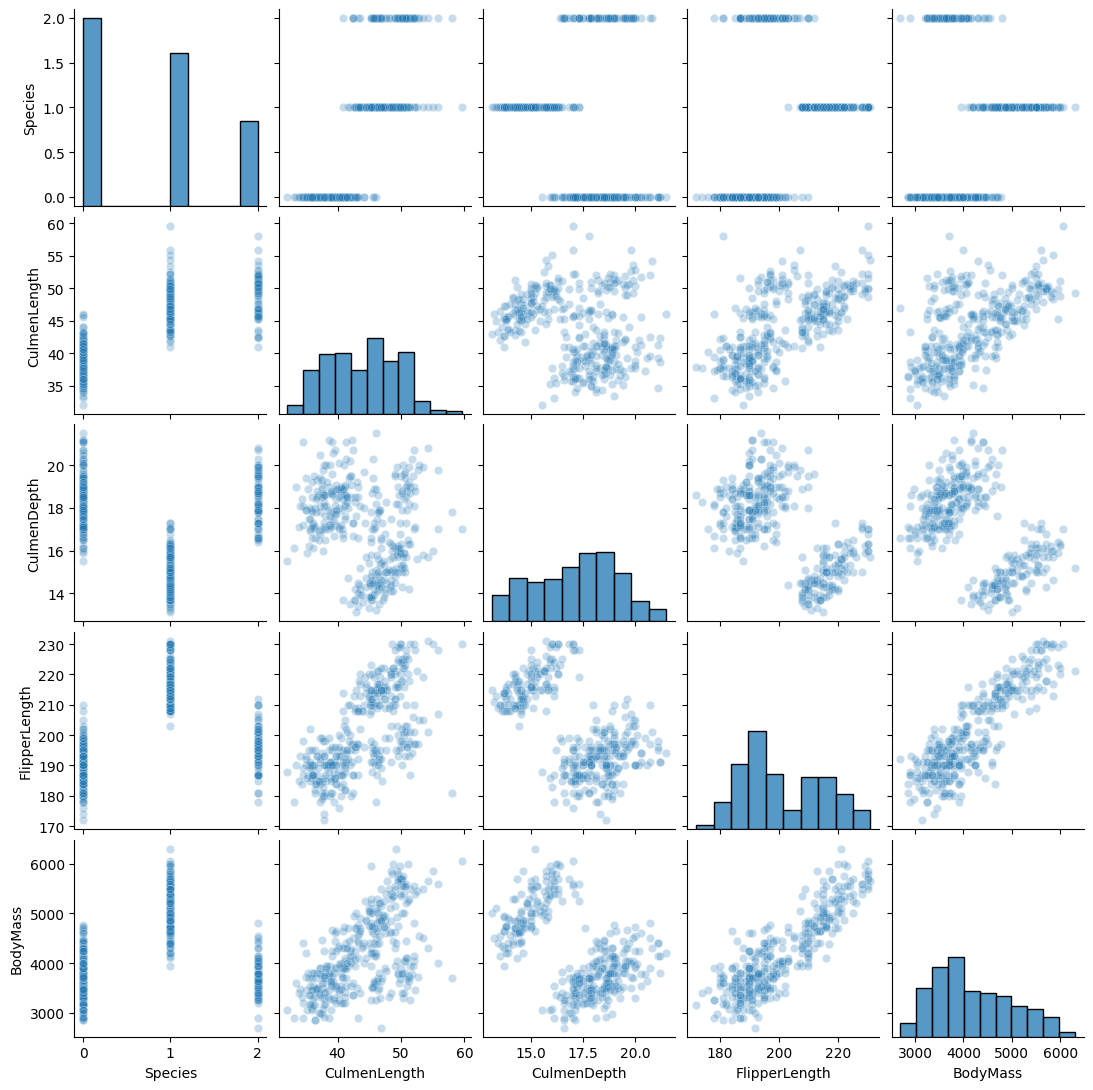

In [51]:
fig = sns.pairplot(pengwings[[target]+features_num], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(11, 11)
plt.show()

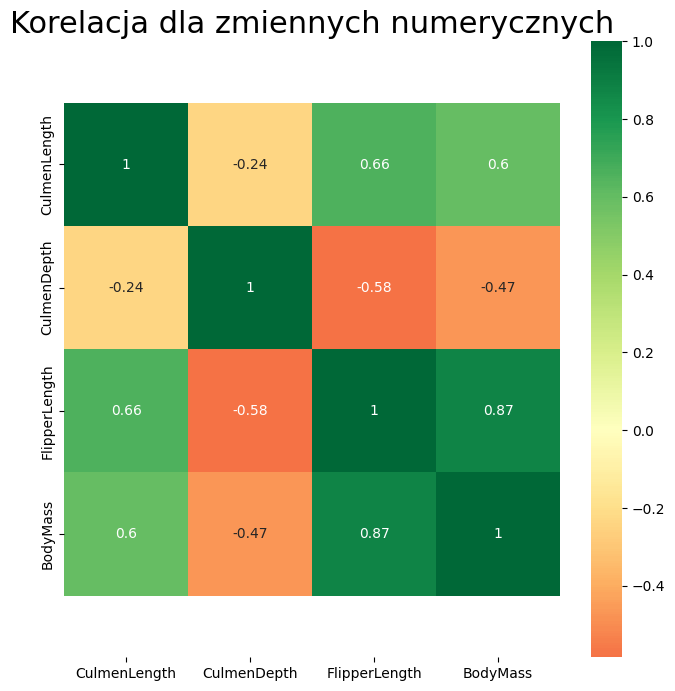

In [52]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [53]:
from scipy import stats

corr_dict = {}
for col in features_num:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.779857
FlipperLength    0.357472
BodyMass         0.209717
CulmenDepth     -0.183090
dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

Treningowe obserwacje: 239
Testowe obserwacje: 103


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

In [56]:
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ' , y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 1 0 2 2] [1 0 1 0 2]
Actual labels:     [0 1 2 2 2] [1 0 1 0 2]


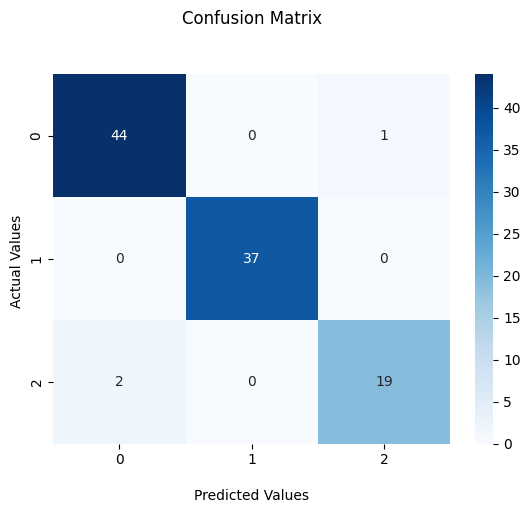

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr, average='macro'))
print("Recall:", recall_score(y_test, predictions_lr, average='macro'))
print("F1_score:", f1_score(y_test, predictions_lr, average='macro')) 

Accuracy:  0.970873786407767
Precision: 0.9688405797101449
Recall: 0.9608465608465608
F1_score: 0.96462074510855


C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\2140119191.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


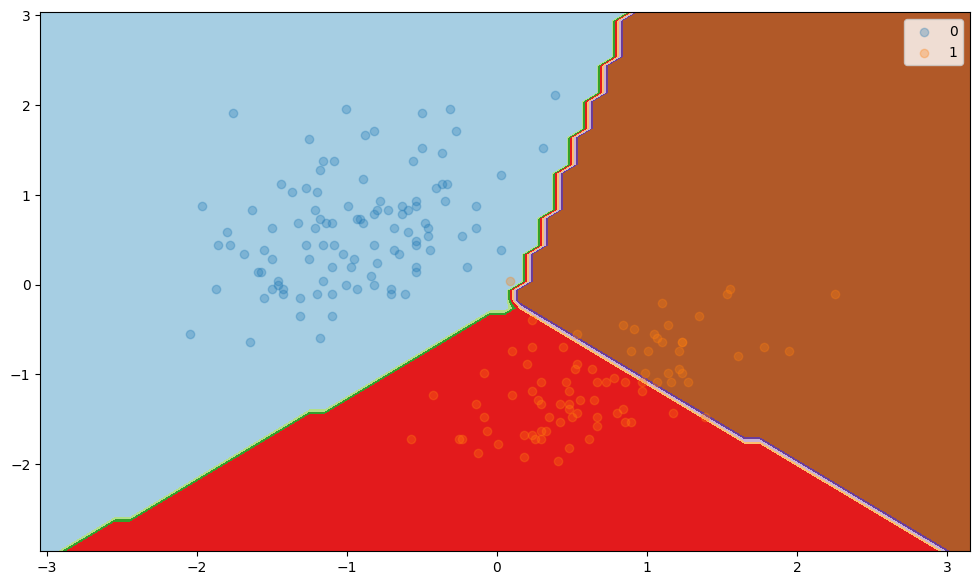

In [59]:
import numpy as np
from numpy import where, meshgrid, arange, hstack
import matplotlib.pyplot as plt

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    min1, max1 = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    min2, max2 = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    xx, yy = meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = hstack((r1, r2))

    if grid.shape[1] != trained_model.n_features_in_:
        grid = hstack((grid, np.zeros((grid.shape[0], trained_model.n_features_in_ - grid.shape[1]))))

    yhat = trained_model.predict(grid)

    zz = yhat.reshape(xx.shape)


    plt.contourf(xx, yy, zz, cmap='Paired')

    for class_value in range(2):
        row_ix = where(y_plot == class_value)
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized[:, :2], y_plot=y_train, trained_model=model_lr)

In [60]:
from sklearn.metrics import classification_report

predictions_lr = model_lr.predict(X_test_standardized)
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



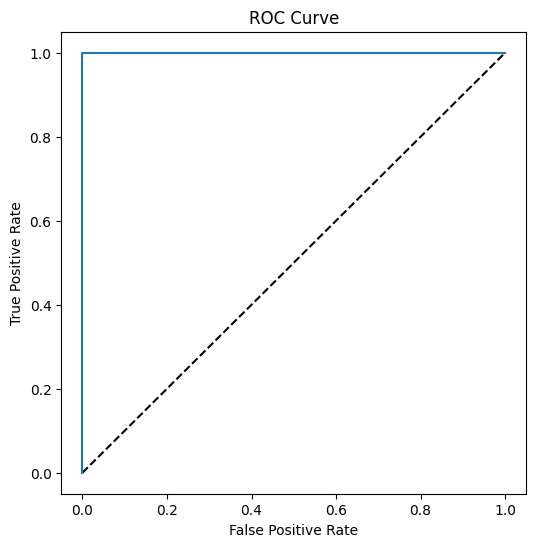

AUC: 0.9992945326278658


In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1], pos_label=1)

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr, multi_class="ovo")
print('AUC: ' + str(auc))

In [62]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score','F1_score_train','Accuracy','Precision', 'Recall', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])
    if np.all(X_checked == X_test):
        prediction_train = model.predict(X_train)
    else:
        prediction_train = model.predict(X_train_standardized)

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba, pos_label=1)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions, average='weighted')
    f1_metric_train = f1_score(y_train, prediction_train, average='weighted')
    accuracy  = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall    = recall_score(y_test, predictions, average='weighted')
    auc_metric = roc_auc_score(y_checked, predictions_proba, multi_class = 'ovo')
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



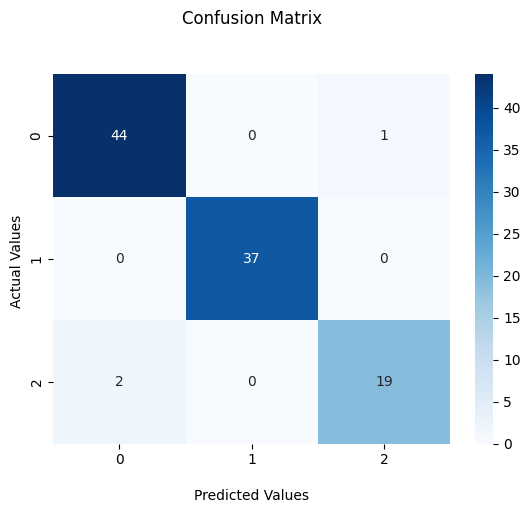

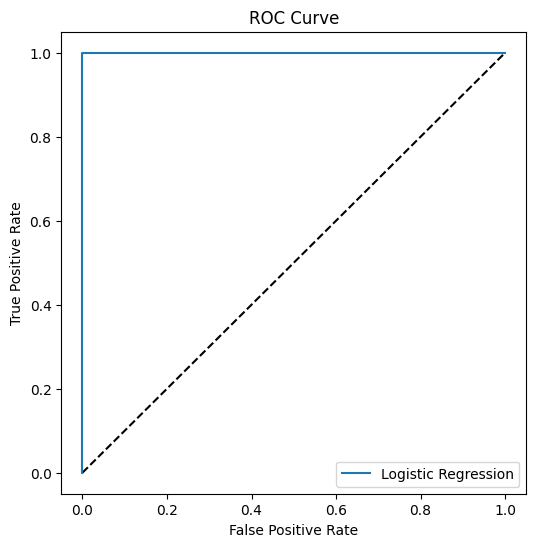

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


,Model,F1_score,F1_score_train,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.970679,0.995803,0.970874,0.97081,0.970874,0.999295


In [63]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

In [64]:
model_knn = KNeighborsClassifier(n_neighbors= 3)
model_knn.fit(X_train_standardized, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
from sklearn.model_selection import GridSearchCV

knn = model_knn

params_rf = {'n_neighbors' : [3, 5, 10, 20]}
             
rf_gridsearch = GridSearchCV(knn,
                             params_rf,
                             scoring='f1_weighted',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
model_knn_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best hyperparameter: {'n_neighbors': 3}


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.36      1.00      0.53        37
           2       0.00      0.00      0.00        21

    accuracy                           0.36       103
   macro avg       0.12      0.33      0.18       103
weighted avg       0.13      0.36      0.19       103



C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-define

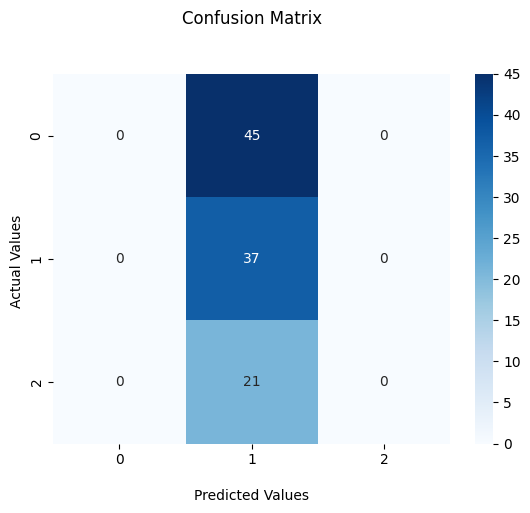

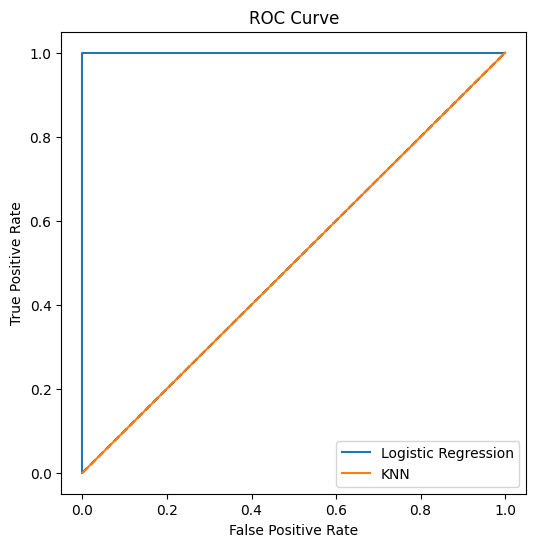

              precision    recall  f1-score   support

           0       0.70      0.87      0.77        45
           1       0.97      0.86      0.91        37
           2       0.43      0.29      0.34        21

    accuracy                           0.75       103
   macro avg       0.70      0.67      0.68       103
weighted avg       0.74      0.75      0.74       103



C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


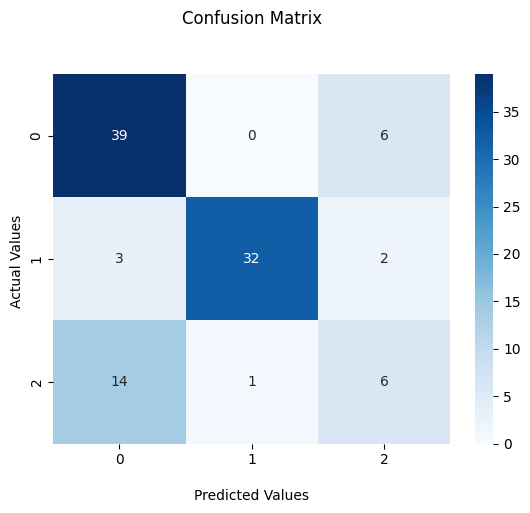

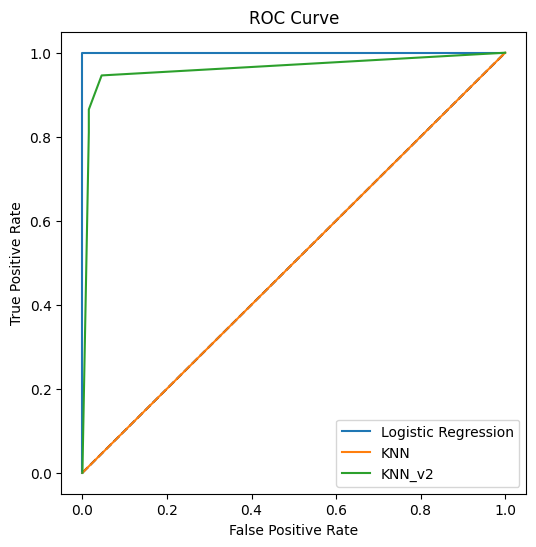

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


,Model,F1_score,F1_score_train,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.970679,0.995803,0.970874,0.970810,0.970874,0.999295
1,KNN,0.189875,0.190435,0.359223,0.129041,0.359223,0.500000
2,KNN_v2,0.735738,0.902308,0.747573,0.739981,0.747573,0.808520


In [66]:
calculate_metrics(model_knn, 'KNN', X_test, y_test)
calculate_metrics(model_knn_v2, 'KNN_v2', X_test, y_test)

In [67]:
model_knn = KNeighborsClassifier(n_neighbors= 3)
model_knn.fit(X_train_standardized, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [69]:
from sklearn.model_selection import GridSearchCV

tree = model_tree
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(tree,
                             params_rf,
                             scoring='f1_weighted',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
model_tree_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       0.86      0.98      0.92        45
           1       1.00      0.97      0.99        37
           2       0.94      0.71      0.81        21

    accuracy                           0.92       103
   macro avg       0.93      0.89      0.90       103
weighted avg       0.93      0.92      0.92       103



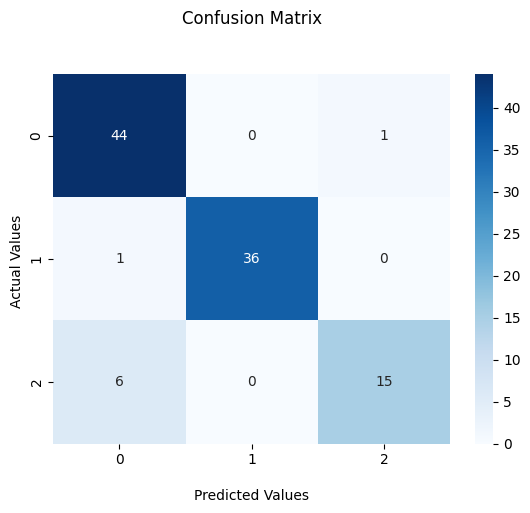

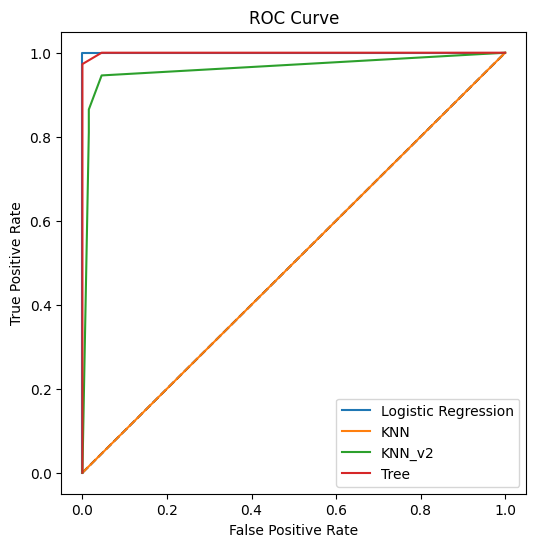

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        45
           1       1.00      0.97      0.99        37
           2       0.94      0.76      0.84        21

    accuracy                           0.93       103
   macro avg       0.94      0.90      0.92       103
weighted avg       0.94      0.93      0.93       103



C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


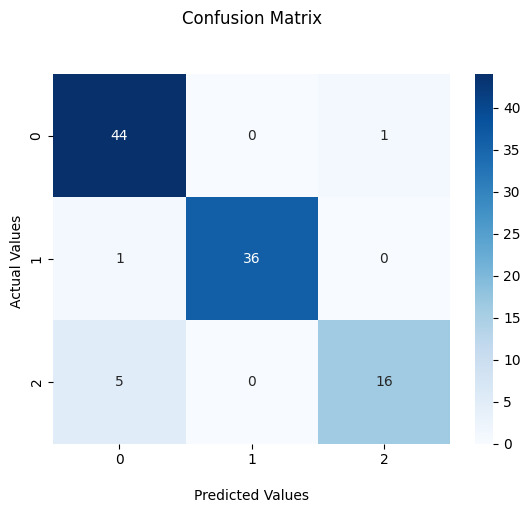

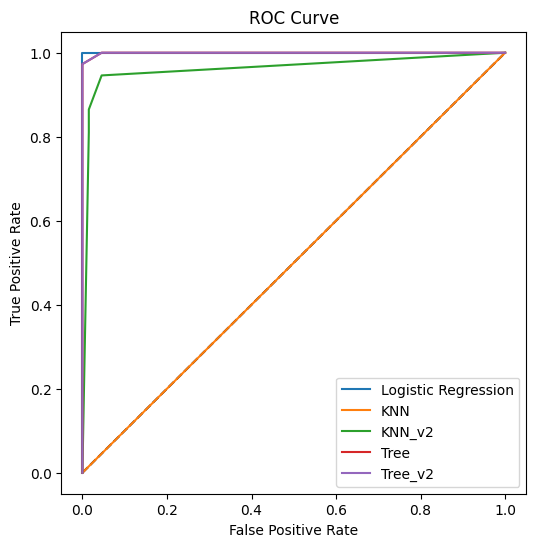

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


,Model,F1_score,F1_score_train,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.970679,0.995803,0.970874,0.970810,0.970874,0.999295
1,KNN,0.189875,0.190435,0.359223,0.129041,0.359223,0.500000
2,KNN_v2,0.735738,0.902308,0.747573,0.739981,0.747573,0.808520
3,Tree,0.920099,0.970311,0.922330,0.927292,0.922330,0.979370
4,Tree_v2,0.930695,0.983199,0.932039,0.935580,0.932039,0.969198


In [70]:
calculate_metrics(model_tree, 'Tree', X_test, y_test)
calculate_metrics(model_tree_v2, 'Tree_v2', X_test, y_test)

In [71]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)

SVC(probability=True)

In [72]:
from sklearn.model_selection import GridSearchCV

svm = model_svm
params_rf = {'C': [0.1, 1, 10, 100, 1000]}
rf_gridsearch = GridSearchCV(svm,
                             params_rf,
                             scoring='f1_weighted',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
model_svm_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best hyperparameter: {'C': 1000}


              precision    recall  f1-score   support

           0       0.44      1.00      0.61        45
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        21

    accuracy                           0.44       103
   macro avg       0.15      0.33      0.20       103
weighted avg       0.19      0.44      0.27       103



C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted 

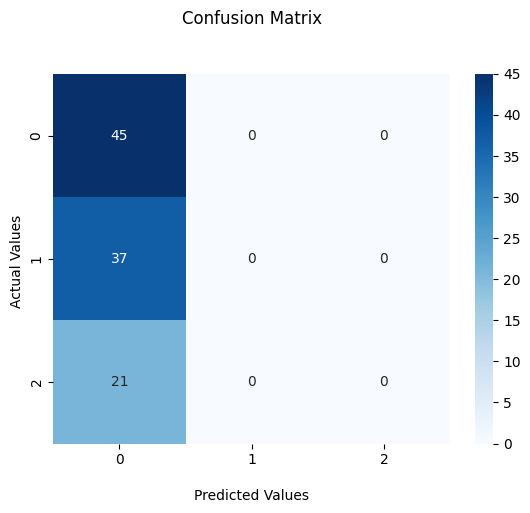

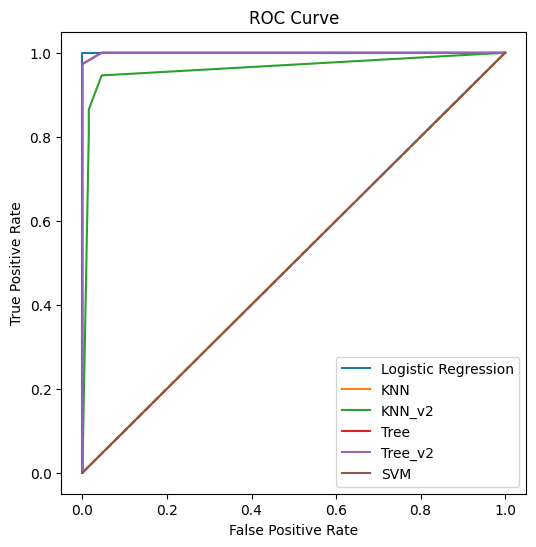

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        45
           1       0.94      0.84      0.89        37
           2       0.00      0.00      0.00        21

    accuracy                           0.74       103
   macro avg       0.53      0.61      0.56       103
weighted avg       0.62      0.74      0.66       103



C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

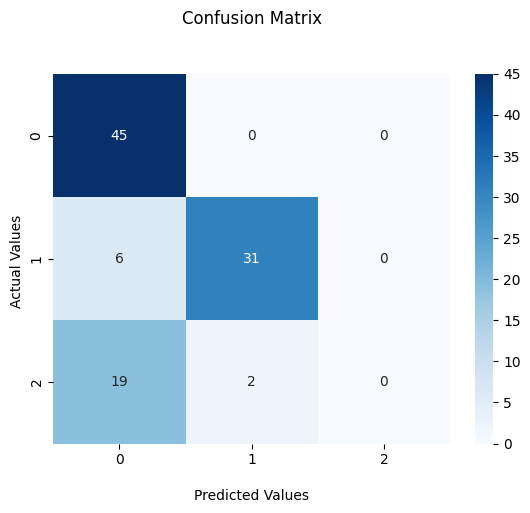

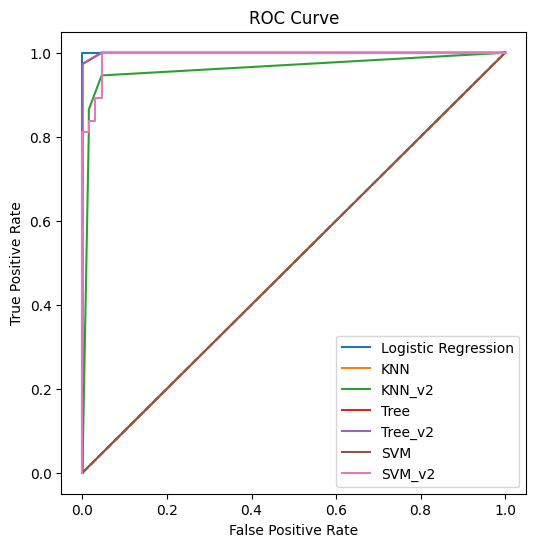

C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


,Model,F1_score,F1_score_train,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.970679,0.995803,0.970874,0.970810,0.970874,0.999295
1,KNN,0.189875,0.190435,0.359223,0.129041,0.359223,0.500000
2,KNN_v2,0.735738,0.902308,0.747573,0.739981,0.747573,0.808520
3,Tree,0.920099,0.970311,0.922330,0.927292,0.922330,0.979370
4,Tree_v2,0.930695,0.983199,0.932039,0.935580,0.932039,0.969198
5,SVM,0.265678,0.272537,0.436893,0.190876,0.436893,0.500000
6,SVM_v2,0.660086,0.711071,0.737864,0.618312,0.737864,0.979804


In [73]:
calculate_metrics(model_svm, 'SVM', X_test, y_test)
calculate_metrics(model_svm_v2, 'SVM_v2', X_test, y_test)

In [74]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf= 3)
model_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=1000)

In [75]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
random_forest_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



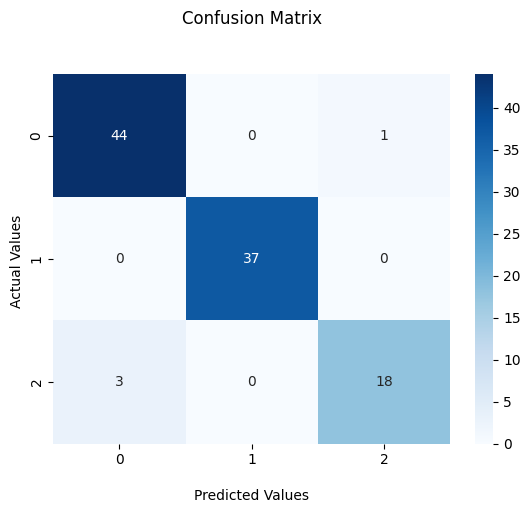

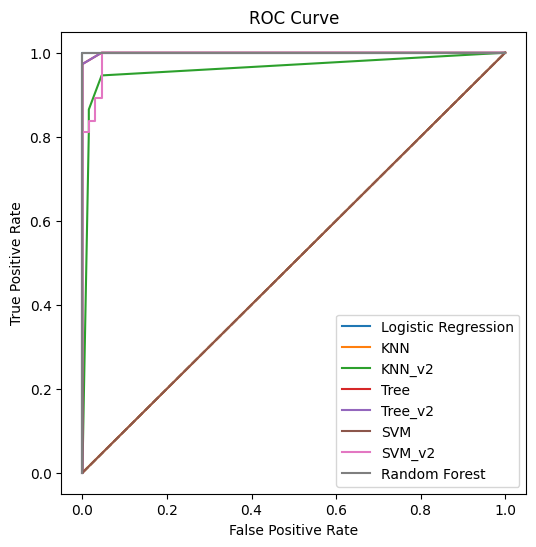

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



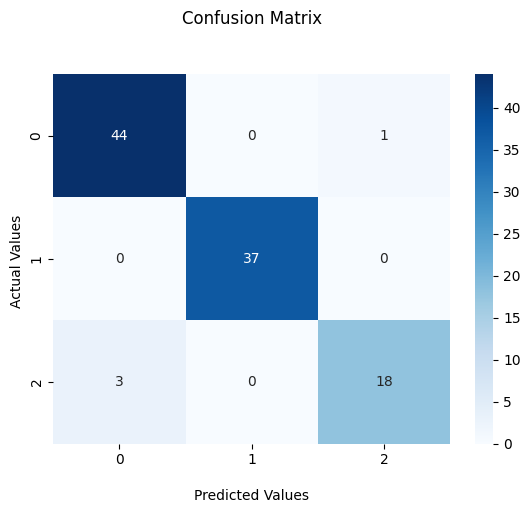

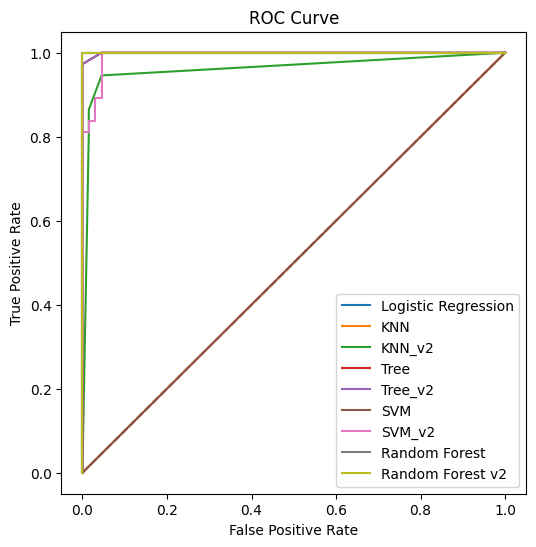

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


,Model,F1_score,F1_score_train,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.970679,0.995803,0.970874,0.970810,0.970874,0.999295
1,KNN,0.189875,0.190435,0.359223,0.129041,0.359223,0.500000
2,KNN_v2,0.735738,0.902308,0.747573,0.739981,0.747573,0.808520
3,Tree,0.920099,0.970311,0.922330,0.927292,0.922330,0.979370
4,Tree_v2,0.930695,0.983199,0.932039,0.935580,0.932039,0.969198
5,SVM,0.265678,0.272537,0.436893,0.190876,0.436893,0.500000
6,SVM_v2,0.660086,0.711071,0.737864,0.618312,0.737864,0.979804
7,Random Forest,0.960616,0.974895,0.961165,0.961382,0.961165,0.991205
8,Random Forest v2,0.960616,0.974895,0.961165,0.961382,0.961165,0.992655


In [76]:
calculate_metrics(model_forest, 'Random Forest', X_test, y_test)
calculate_metrics(random_forest_v2, 'Random Forest v2', X_test, y_test)

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)

C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80        45
           1       0.97      1.00      0.99        37
           2       0.00      0.00      0.00        21

    accuracy                           0.79       103
   macro avg       0.55      0.66      0.60       103
weighted avg       0.65      0.79      0.70       103



C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


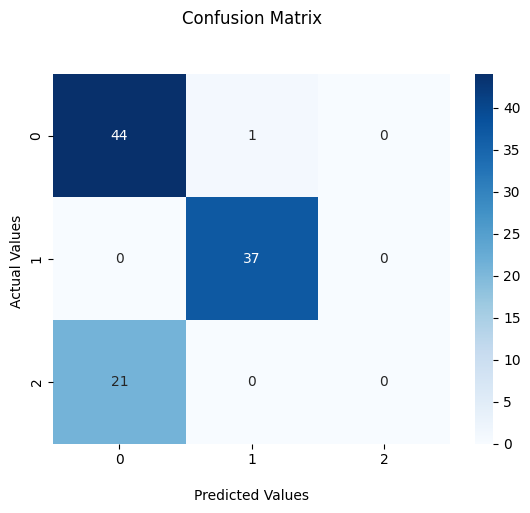

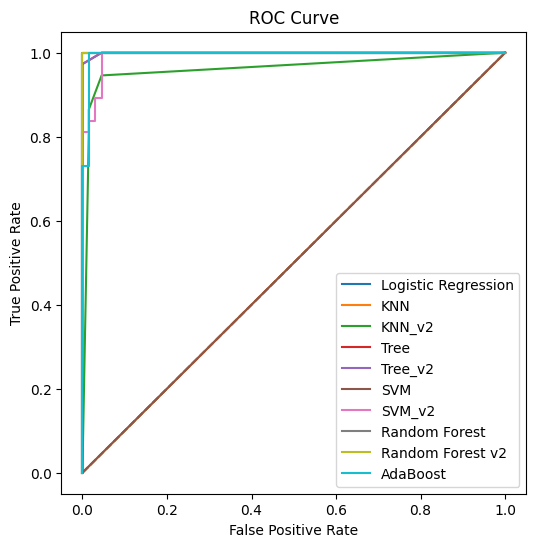

C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


,Model,F1_score,F1_score_train,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.970679,0.995803,0.970874,0.970810,0.970874,0.999295
1,KNN,0.189875,0.190435,0.359223,0.129041,0.359223,0.500000
2,KNN_v2,0.735738,0.902308,0.747573,0.739981,0.747573,0.808520
3,Tree,0.920099,0.970311,0.922330,0.927292,0.922330,0.979370
4,Tree_v2,0.930695,0.983199,0.932039,0.935580,0.932039,0.969198
5,SVM,0.265678,0.272537,0.436893,0.190876,0.436893,0.500000
6,SVM_v2,0.660086,0.711071,0.737864,0.618312,0.737864,0.979804
7,Random Forest,0.960616,0.974895,0.961165,0.961382,0.961165,0.991205
8,Random Forest v2,0.960616,0.974895,0.961165,0.961382,0.961165,0.992655
9,AdaBoost,0.703948,0.754145,0.786408,0.645513,0.786408,0.839540


In [78]:
calculate_metrics(model_adaboost, 'AdaBoost', X_test, y_test)

In [79]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)

C:\Users\kamil\Desktop\Kodilla\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('Tree',
                              DecisionTreeClassifier(max_depth=3,
                                                     min_samples_leaf=3)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=3,
                                                     min_samples_leaf=3,
                                                     n_estimators=1000)),
                             ('AdaBoost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)))],
                 voting='soft')

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



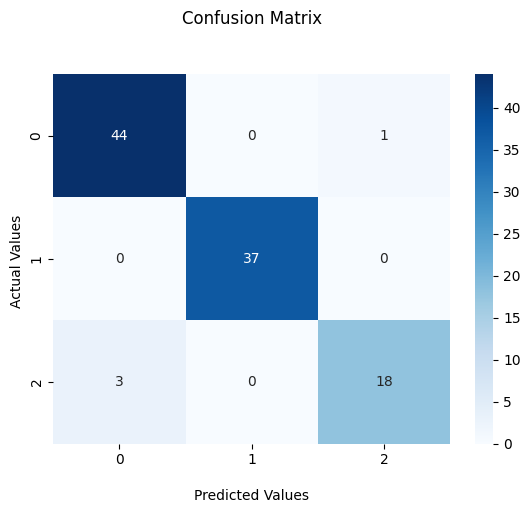

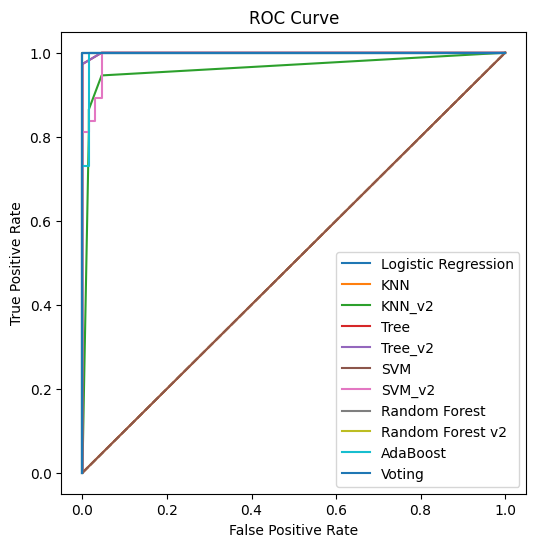

C:\Users\kamil\AppData\Local\Temp\ipykernel_22340\3714963044.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score_train': f1_metric_train ,'Accuracy': accuracy,'Precision': precision, 'Recall':recall ,'AUC': auc_metric},


,Model,F1_score,F1_score_train,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.970679,0.995803,0.970874,0.970810,0.970874,0.999295
1,KNN,0.189875,0.190435,0.359223,0.129041,0.359223,0.500000
2,KNN_v2,0.735738,0.902308,0.747573,0.739981,0.747573,0.808520
3,Tree,0.920099,0.970311,0.922330,0.927292,0.922330,0.979370
4,Tree_v2,0.930695,0.983199,0.932039,0.935580,0.932039,0.969198
5,SVM,0.265678,0.272537,0.436893,0.190876,0.436893,0.500000
6,SVM_v2,0.660086,0.711071,0.737864,0.618312,0.737864,0.979804
7,Random Forest,0.960616,0.974895,0.961165,0.961382,0.961165,0.991205
8,Random Forest v2,0.960616,0.974895,0.961165,0.961382,0.961165,0.992655
9,AdaBoost,0.703948,0.754145,0.786408,0.645513,0.786408,0.839540


In [80]:
calculate_metrics(model_voting, 'Voting', X_test, y_test)

In [81]:
Najlepsze modele:
Voting i Random Forest v2: Oba modele mają bardzo wysokie wartości F1_score, Accuracy, Precision, Recall i AUC. Są to najlepsze modele w tym zestawieniu.
Logistic Regression: Ma wysokie wartości F1_score, Accuracy, Precision, Recall i AUC, co wskazuje na bardzo dobrą wydajność.

Najgorsze modele:
KNN (z niskimi wartościami F1_score): Modele KNN mają najniższe wyniki, zwłaszcza w porównaniu z innymi modelami, co sugeruje słabą wydajność na tym zestawie danych.

Overfitting:
Tree i Random Forest: Bardzo wysokie wartości F1_score_train mogą wskazywać na overfitting, zwłaszcza jeśli różnią się znacząco od wartości F1_score na zbiorze testowym.

SyntaxError: invalid syntax (1800507237.py, line 1)